### Get libraries and import data

In [77]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 

In [78]:
df = pd.read_csv('./dataset/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### EDA

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [80]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [81]:
df.isna().sum().sort_values(ascending = False) 

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

In [82]:
df.dropna(subset=['RainTomorrow'], inplace = True)

In [83]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

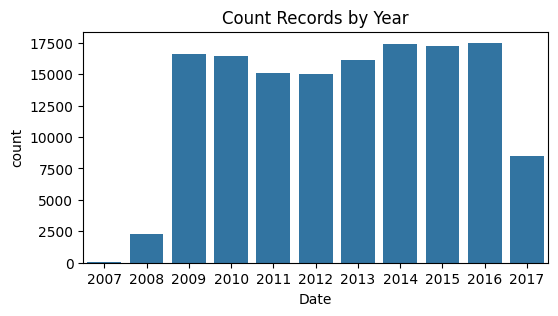

In [84]:
plt.figure(figsize = (6,3))

sns.countplot(data = df 
              , x = df['Date'].astype('datetime64[ns]').dt.year
              )

plt.title('Count Records by Year')

plt.show()

### Split datasets (Train - Val - Test)

In [85]:
df_train = df[df['Date'].astype('datetime64[ns]').dt.year < 2015]
df_val = df[df['Date'].astype('datetime64[ns]').dt.year == 2015]
df_test = df[df['Date'].astype('datetime64[ns]').dt.year > 2015]

In [86]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [87]:
input_cols = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday']

target_col = 'RainTomorrow'

In [88]:
#Lấy các inputs
inputs_train = df_train[input_cols]
inputs_val = df_val[input_cols]
inputs_test = df_test[input_cols]

#Lấy các target
target_train = df_train[target_col]
target_val = df_val[target_col]
target_test = df_test[target_col]

#Kiểm tra số lượng
print('inputs_train shape:', inputs_train.shape)
print('inputs_val shape:', inputs_val.shape)
print('inputs_test shape:', inputs_test.shape)

print('---')

print('target_train shape:', target_train.shape)
print('target_val shape:', target_val.shape)
print('target_test shape:', target_test.shape)

inputs_train shape: (98988, 21)
inputs_val shape: (17231, 21)
inputs_test shape: (25974, 21)
---
target_train shape: (98988,)
target_val shape: (17231,)
target_test shape: (25974,)


In [89]:
num_cols = inputs_train.select_dtypes(include = np.number).columns.to_list()
cat_cols = inputs_train.select_dtypes(include = 'object').columns.to_list()

In [90]:
print('numeric cols:', num_cols)

print('---')

print('categorical cols:', cat_cols)

numeric cols: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
---
categorical cols: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


### Preprocessing

In [91]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [92]:
imputer = SimpleImputer(strategy='mean')
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler = MinMaxScaler()

#### Impute numeric columns (num_cols)

In [93]:
imputer.fit(df[num_cols])

SimpleImputer()

In [94]:
inputs_train[num_cols] = imputer.transform(inputs_train[num_cols])
inputs_val[num_cols] = imputer.transform(inputs_val[num_cols])
inputs_test[num_cols] = imputer.transform(inputs_test[num_cols])

C:\Users\TuNguyen\AppData\Local\Temp\ipykernel_22300\1662759620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs_train[num_cols] = imputer.transform(inputs_train[num_cols])
C:\Users\TuNguyen\AppData\Local\Temp\ipykernel_22300\1662759620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs_val[num_cols] = imputer.transform(inputs_val[num_cols])
C:\Users\TuNguyen\AppData\Local\Temp\ipykernel_22300\1662759620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [95]:
inputs_train[num_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

#### Scailing numeric features (num_cols)

In [96]:
scaler.fit(df[num_cols])

MinMaxScaler()

In [97]:
inputs_train[num_cols] = scaler.transform(inputs_train[num_cols])
inputs_val[num_cols] = scaler.transform(inputs_val[num_cols])
inputs_test[num_cols] = scaler.transform(inputs_test[num_cols])

C:\Users\TuNguyen\AppData\Local\Temp\ipykernel_22300\3498834764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs_train[num_cols] = scaler.transform(inputs_train[num_cols])
C:\Users\TuNguyen\AppData\Local\Temp\ipykernel_22300\3498834764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs_val[num_cols] = scaler.transform(inputs_val[num_cols])
C:\Users\TuNguyen\AppData\Local\Temp\ipykernel_22300\3498834764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [98]:
df.describe().loc[['min','max']]

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,2007-11-01 00:00:00,-8.5,-4.8,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.5,977.1,0.0,0.0,-7.2,-5.4
max,2017-06-25 00:00:00,33.9,48.1,371.0,145.0,14.5,135.0,130.0,87.0,100.0,100.0,1041.0,1039.6,9.0,9.0,40.2,46.7


In [99]:
df_train.describe().loc[['min','max']]

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,2007-11-01 00:00:00,-8.5,-4.1,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.5,979.0,0.0,0.0,-5.9,-5.1
max,2014-12-31 00:00:00,33.9,48.1,371.0,82.4,14.3,135.0,87.0,87.0,100.0,100.0,1041.0,1039.6,9.0,9.0,40.2,46.1


In [100]:
df_val.describe().loc[['min','max']]

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,2015-01-01 00:00:00,-8.2,-3.2,0.0,0.0,0.0,7.0,0.0,0.0,4.0,0.0,988.1,982.2,0.0,0.0,-6.2,-4.0
max,2015-12-31 00:00:00,31.9,45.4,247.2,70.4,14.5,135.0,87.0,74.0,100.0,100.0,1039.3,1037.3,8.0,8.0,37.5,42.8


In [101]:
df_test.describe().loc[['min','max']]

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,2016-01-01 00:00:00,-7.8,-4.8,0.0,0.0,0.0,7.0,0.0,0.0,4.0,3.0,982.0,977.1,0.0,0.0,-7.2,-5.4
max,2017-06-25 00:00:00,31.4,47.3,225.0,145.0,14.1,120.0,130.0,65.0,100.0,100.0,1040.3,1036.5,8.0,8.0,37.6,46.7


#### Encoding categorical columns (cat_cols)

In [102]:
encoder.fit(df[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [103]:
encoded_cols = list(encoder.get_feature_names_out(cat_cols))
encoded_cols[1:10]

['Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra']

In [104]:
inputs_train[encoded_cols] = encoder.transform(inputs_train[cat_cols])
inputs_val[encoded_cols] = encoder.transform(inputs_val[cat_cols])
inputs_test[encoded_cols] = encoder.transform(inputs_test[cat_cols])

C:\Users\TuNguyen\AppData\Local\Temp\ipykernel_22300\2450479291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs_train[encoded_cols] = encoder.transform(inputs_train[cat_cols])
C:\Users\TuNguyen\AppData\Local\Temp\ipykernel_22300\2450479291.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs_train[encoded_cols] = encoder.transform(inputs_train[cat_cols])
C:\Users\TuNguyen\AppData\Local\Temp\ipykernel_22300\2450479291.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

In [105]:
inputs_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,Albury,0.516509,0.523629,0.001617,0.037723,0.525852,W,0.294574,W,WNW,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,Albury,0.375000,0.565217,0.000000,0.037723,0.525852,WNW,0.294574,NNW,WSW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,Albury,0.504717,0.576560,0.000000,0.037723,0.525852,WSW,0.310078,W,WSW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Albury,0.417453,0.620038,0.000000,0.037723,0.525852,NE,0.139535,SE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Albury,0.613208,0.701323,0.002695,0.037723,0.525852,W,0.271318,ENE,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,0.599057,0.718336,0.000000,0.037723,0.525852,SSE,0.286822,ESE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144549,Uluru,0.556604,0.786389,0.000000,0.037723,0.525852,NE,0.193798,ENE,SW,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144550,Uluru,0.608491,0.805293,0.000000,0.037723,0.525852,ESE,0.255814,ESE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144551,Uluru,0.674528,0.818526,0.000000,0.037723,0.525852,ESE,0.286822,ESE,SSW,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [106]:
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [107]:
X_train = inputs_train[num_cols + encoded_cols]
X_val= inputs_val[num_cols + encoded_cols]
X_test = inputs_test[num_cols + encoded_cols]

In [108]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,0.681604,0.801512,0.000000,0.037723,0.525852,0.372093,0.000000,0.080460,0.46,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,0.693396,0.725898,0.001078,0.037723,0.525852,0.341085,0.069231,0.195402,0.54,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,0.634434,0.527410,0.005930,0.037723,0.525852,0.325581,0.084615,0.448276,0.62,0.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,0.608491,0.538752,0.042049,0.037723,0.525852,0.255814,0.069231,0.195402,0.74,0.65,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2502,0.566038,0.523629,0.018329,0.037723,0.525852,0.193798,0.046154,0.103448,0.92,0.63,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0.283019,0.502836,0.000000,0.037723,0.525852,0.193798,0.115385,0.149425,0.59,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145455,0.266509,0.533081,0.000000,0.037723,0.525852,0.193798,0.100000,0.126437,0.51,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145456,0.285377,0.568998,0.000000,0.037723,0.525852,0.124031,0.100000,0.103448,0.56,0.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145457,0.327830,0.599244,0.000000,0.037723,0.525852,0.240310,0.069231,0.103448,0.53,0.24,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Training and Visualizing Decision Trees

1 cây quyết định Decision Tree biểu diễn việc đưa ra quyết định theo dạng sơ đồ cây của 1 chuỗi phân cấp quyết định dạng binary:

<img src="https://www.theclickreader.com/wp-content/uploads/2021/07/Decision-Tree-Classifier-1024x576.png" width="480">

Cây quyết định trong Machine Learning hoạt động theo cách hoàn toàn giống như vậy, ngoại trừ việc chúng ta để máy tính tìm ra cấu trúc và thứ bậc tối ưu của các quyết định, thay vì đưa ra tiêu chí theo cách thủ công.

#### Train

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
model = DecisionTreeClassifier(random_state=42)

In [111]:
%%time 
model.fit(X = X_train, y = target_train)

CPU times: total: 3.52 s
Wall time: 3.65 s


DecisionTreeClassifier(random_state=42)

In [112]:
model.score(X_train, target_train)

0.9999797955307714

#### Evaluate

In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [114]:
def predict_and_plot(inputs, targets, name=''):
    
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print('Accuracy: {:.2f}%'.format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure(figsize = (6,3))
    sns.heatmap(cf, annot=True, cmap = 'RdBu')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 100.00%


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

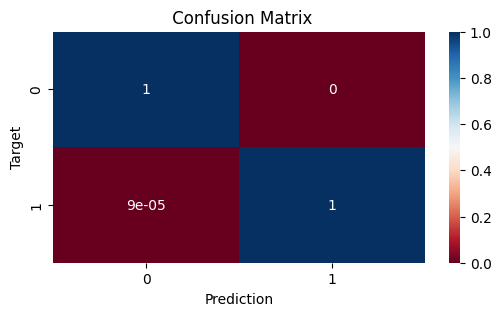

In [115]:
predict_and_plot(X_train, target_train)

Accuracy: 79.21%


array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

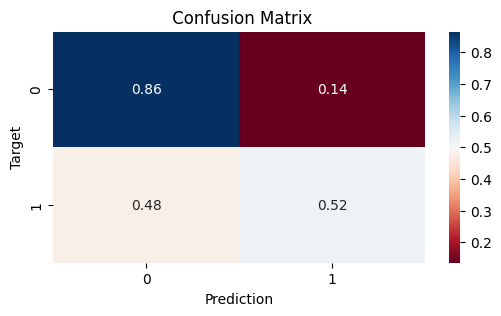

In [116]:
predict_and_plot(X_val, target_val)

Accuracy: 77.41%


array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

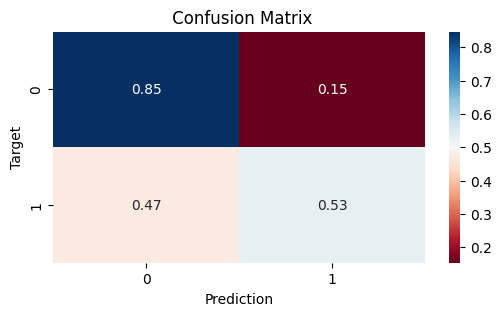

In [117]:
predict_and_plot(X_test, target_test)

Có thể thấy model được train với tỉ lệ chính xác lên tới 100% với những dữ liệu được học trong quá khứ. Nhưng khi validate lại thì tỉ lệ chính xác giảm còn 79%. Hiện tượng này gọi là `over-fitting`. Xử lý `over-fitting` là 1 kĩ thuật trong ML.

#### Tree Visualization 

In [118]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.01\ngini = 0.316\nsamples = 7434\nvalue = [1462, 5972]'),
 Text(0.8125, 0.125,

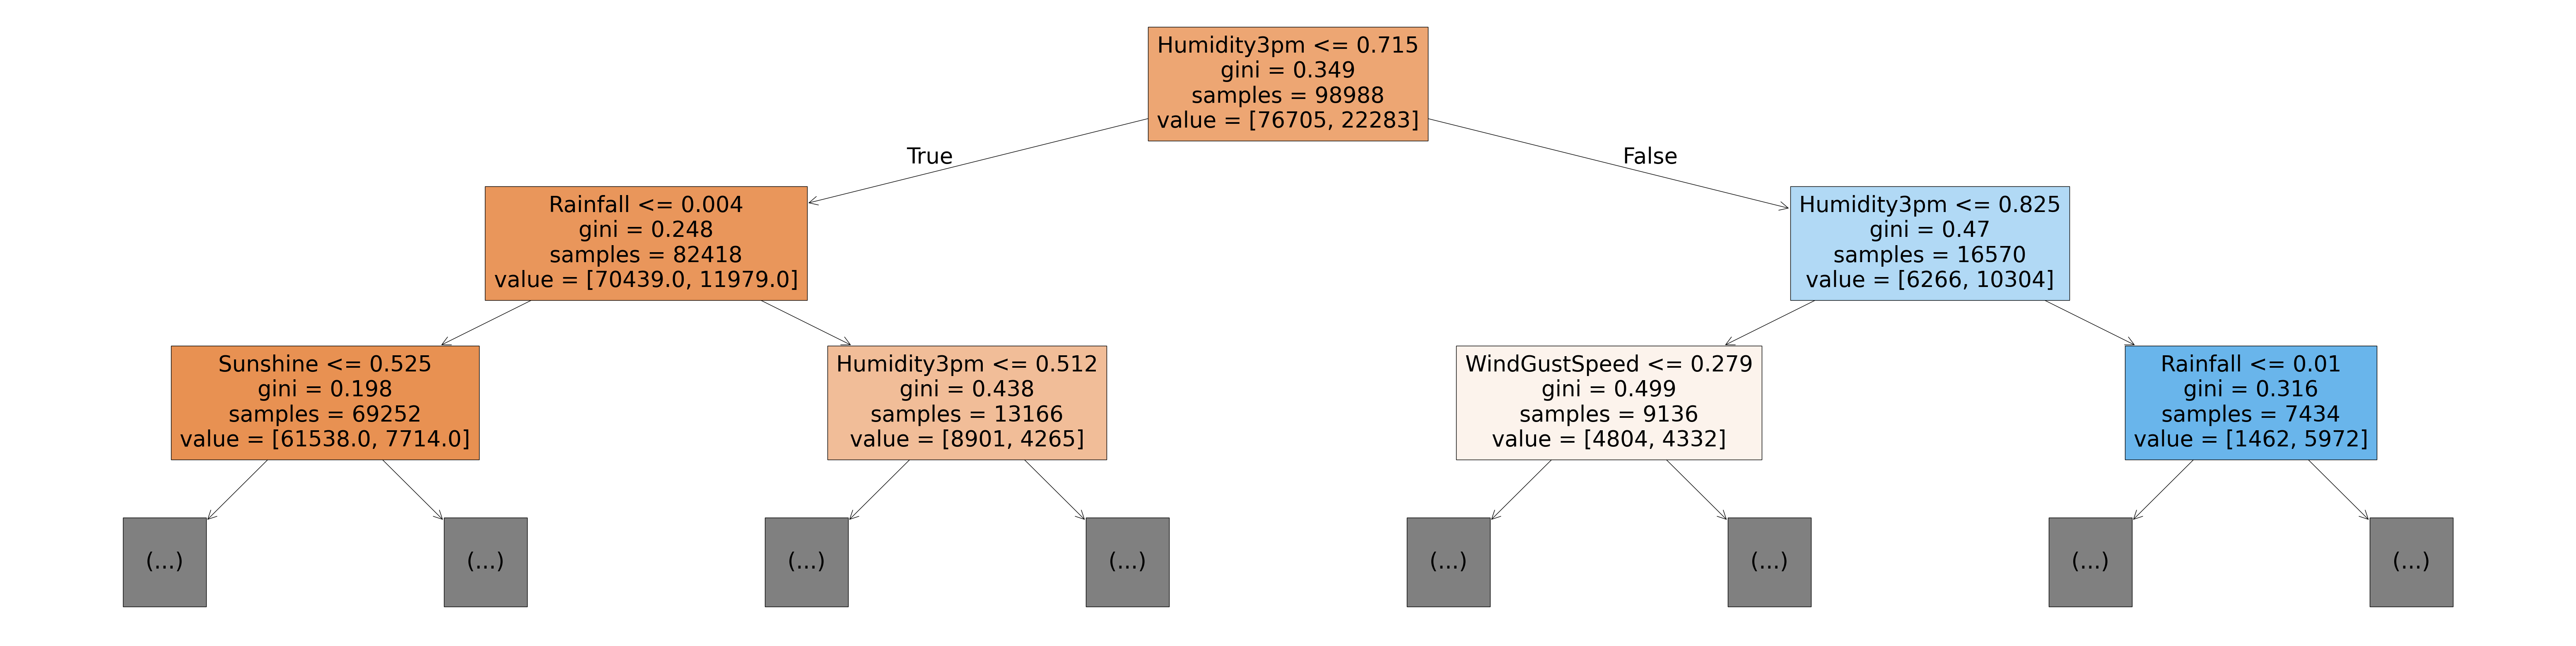

In [119]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True)

Cây quyết định là 1 model phân loại, phân mảnh 1 chuỗi ra quyết định cho tới khi có được kết quả "Yes" hoặc "No"

Có thể thấy không có 1 hệ số cố định nào trong decision tree. Ví dụ: Humidity3PM <= 0.715 trong khi Rainfall < 0.004 ...

Như vậy các mối quan hệ phi tuyến tính sẽ được nắm bắt tốt hơn đối với Decision tree thay vì Logistics Regression.

Ở mỗi box sẽ có 1 hệ số `gini`. Bản chất hệ số này là hàm mất mát `loss function` được sử dụng bởi Decision Tree nhằm đưa ra quyết định cột nào nên được đưa vào sử dụng để phân tách data. Mục tiêu của ML là phải làm giảm loss.

`gini` biểu thị "how good a certain split is?", `gini` thấp = chi phí để split thấp = model tốt

`gini` = 0 => Phân chia hoàn hảo

`gini` tăng => Phân chia tệ hơn. Khi tỉ lệ split là 50 - 50, hệ số `gini` cao


Xem thêm về hệ số `gini` [tại đây](https://www.youtube.com/watch?v=-W0DnxQK1Eo). Công thức:

<img src="https://i.sstatic.net/E7Fak.png" width="240">

Decision tree tự động thực hiện 1 workflow tương tự như ML để tự tối ưu. Chúng tự động phân tách thành các trường hợp, tự tính điểm `gini`. Sau đó, decision tree tự động chọn cột tốt nhất, điểm phân chia tốt nhất, dẫn đến điểm `gini` sẽ thấp nhất có thể (decision tree sử dụng predefined strategy và 1 số phương pháp lấy ngẫu nhiên)

<img src="https://i.imgur.com/tlYiXnp.png" width="480">

Decision tree sẽ split cho tới khi chỉ có 1 output duy nhất (single leaf node), không chia được nữa. Mỗi leaf cuối cùng lúc đó đã có sẵn 1 target (Yes/No)

Chính vì thế, kết quả của quá trình training là 100% vì decision tree đã cố gắng học lại toàn bộ dưới dạng cấu trúc của 1 cây.


Chúng ta có thể kiểm tra depth của tree đã được tạo như sau:

In [120]:
model.tree_.max_depth

48

In [121]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

#### Feature Importance
Dựa vào sự tính toán gini, Decision Tree gán "importance" value cho từng feature. Giá trị này dùng để giải thích lý do của kết quả tạo ra bởi decision tree.

In [122]:
model.feature_importances_

array([3.48942086e-02, 3.23605486e-02, 5.91385668e-02, 2.49619907e-02,
       4.94652143e-02, 5.63334673e-02, 2.80205998e-02, 2.98128801e-02,
       4.02182908e-02, 2.61441297e-01, 3.44145027e-02, 6.20573699e-02,
       1.36406176e-02, 1.69229866e-02, 3.50001550e-02, 3.04064076e-02,
       2.24086587e-03, 2.08018104e-03, 1.27475954e-03, 7.26936324e-04,
       1.39779517e-03, 1.15264873e-03, 6.92808159e-04, 1.80675598e-03,
       1.08370901e-03, 1.19773895e-03, 8.87119103e-04, 2.15764220e-03,
       1.67094731e-03, 7.98919493e-05, 1.10558668e-03, 1.42008656e-03,
       4.10087635e-04, 1.09028115e-03, 1.44164766e-03, 9.08284767e-04,
       1.05770304e-03, 6.18133455e-04, 1.80387272e-03, 2.10403527e-03,
       2.74413333e-04, 7.31599405e-04, 1.35408990e-03, 1.54759332e-03,
       1.30917564e-03, 1.07134670e-03, 8.36408023e-04, 1.62662229e-03,
       1.00326116e-03, 2.16053455e-03, 8.46802258e-04, 1.88919081e-03,
       9.29325203e-04, 1.29545157e-03, 1.27604831e-03, 5.12736888e-04,
      

In [123]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

importance_df

,feature,importance
9,Humidity3pm,0.261441
11,Pressure3pm,0.062057
2,Rainfall,0.059139
5,WindGustSpeed,0.056333
4,Sunshine,0.049465
...,...,...
57,Location_Uluru,0.000397
116,RainToday_No,0.000286
64,Location_Woomera,0.000281
40,Location_Newcastle,0.000274


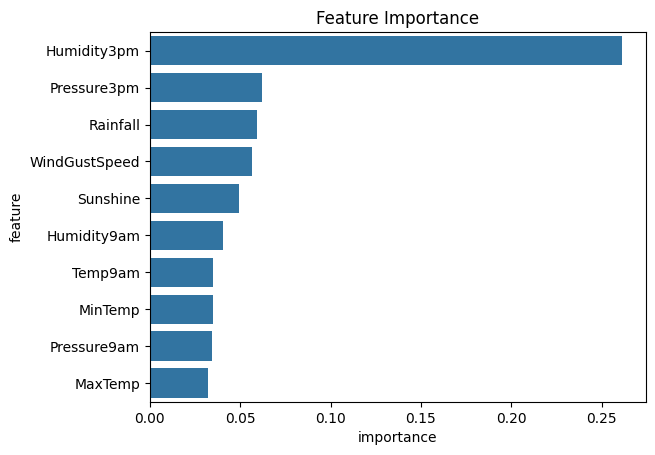

In [124]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');
plt.show()

Humidity3PM đang là giá trị có điểm importance cao nhất. Cần kiểm tra lại xem số lượng missing value của Humidity có nhiều không? Có thể sẽ cần loại bỏ hoặc cố gắng fill đầy nó. Bởi lẽ việc sử dụng imputer có thể đã đánh lừa model bằng cách fill hàng loạt bằng giá trị mean, ...

## Hyperparameter Tuning and Over-fitting

Có thể thấy Decision Tree đã ghi lại toàn bộ training dataset, đạt độ chính xác 100%. Trong khi đó, độ chính xác của tệp validation chỉ đạt khoảng 79% (chỉ nhỉnh hơn 1 chút so với dump model a.k.a baselines model)

Hiện tượng này là over-fitting. Chúng ta cần thực thi 1 số chiến lược giảm over-fitting trong phần tiếp theo.

Quá trình giảm over-fit gọi là `regularlization`

In [125]:
#Kiểm tra hyperparameters
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

Những `hyperparameters` ở đây là những tham số của model != `parameters` mà model học được từ data :)

Trong này, ta sẽ khám phá 2 hyperparams là:
- max_depth: Chặt cây

- max_leaf_nodes: Tỉa lá

### `max_depth`: Độ sâu của cây. Điều này tránh việc cây học quá sâu, học đến hết để ghi nhớ toàn bộ training datasets. Điều này sẽ dẫn tới việc cây sẽ học 1 cách tổng quan, khái quát hơn

In [126]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [127]:
model.fit(X_train, target_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Sử dụng hàm `model.score(train, target)` để đo độ chính xác của model

In [128]:
model.score(X_val, target_val)

0.8334397307178921

In [129]:
model.score(X_test, target_test)

0.8235928235928236

Khi giảm max_depth xuống, độ chính xác đã giảm xuống và điểm của valid tăng lên nhiều.

In [130]:
model.classes_

array(['No', 'Yes'], dtype=object)

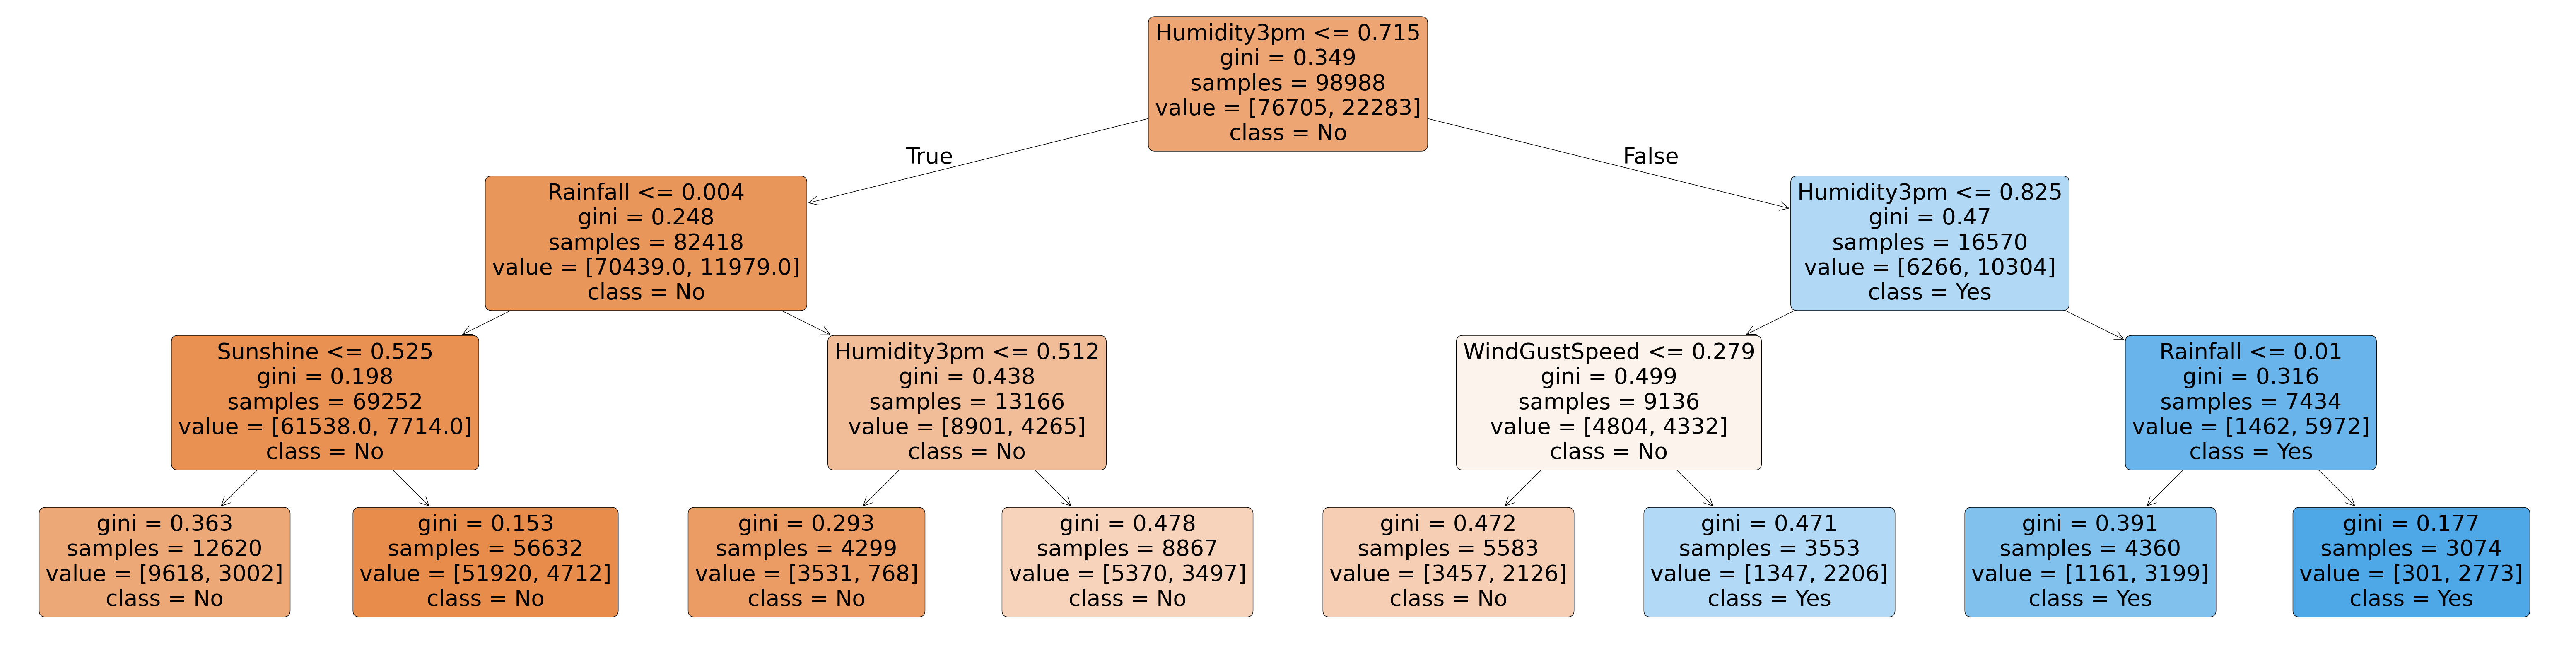

In [131]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

Có thể nhìn thấy rằng, dựa vào model, chỉ cần sử dụng các biến như Humidity - Rainfall - WindGustSpeed - Sunshine là đã đưa ra được kết quả dự đoán lên tới 83%

In [132]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



Từ đó đặt ra câu hỏi, sử dung `max_depth` bao nhiêu là hợp lý? Ít quá = under-fit & Sâu quá = over-fit. Vì vậy phải tuning hyperparameters

In [133]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, target_train)
    train_acc = 1 - model.score(X_train, target_train)
    val_acc = 1 - model.score(X_val, target_val)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [134]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range (1,21)])
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.158029
8,9,0.140906,0.156578
9,10,0.132945,0.157333


Hàm `max_depth_error` vừa được tạo ra đã giúp tính toán tự động các md từ 1 - 20. Khi max_depth tăng lên thì đâu là điểm phù hợp được lựa chọn?

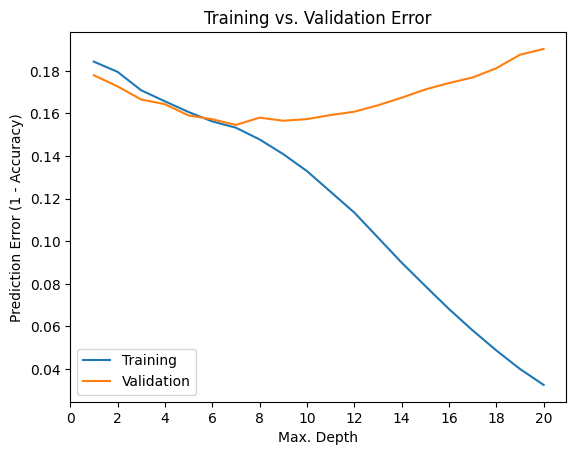

In [135]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

Có thể thấy, khi tăng depth thì training error giảm dần, trong khi validation error giảm -> chạm đáy -> tăng như 1 đường cong parabol.

Điểm đáy của validation error sẽ là nơi `best-fit`.

Đây là 1 pattern thường thấy trong model ML

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

Vì vậy **max_depth = 7** là điểm `best-fit`

In [136]:
model = DecisionTreeClassifier(max_depth=7, random_state=42)
model.fit(X_train, target_train)
model.score(X_val, target_val) , model.score(X_test, target_test)

(0.8453949277465034, 0.8310618310618311)

### `max_leaf_nodes`: Giới hạn số lượng lá của mô hình. Tức là trong mỗi lần chia sẽ tạo ra 2 lá, 1 trong 2 lá có gini tốt hơn thì sử dụng lá đó để chia thành 2 leaf khác nữa. Tiếp tục so sánh 3 lá với nhau v.v.. Sao cho đủ số lượng max_leaf_nodes

Ảnh minh họa:

<img src= "https://media.geeksforgeeks.org/wp-content/uploads/LeafNodeFromPreorder.png" width = 480 >

In [137]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)
model.fit(X_train, target_train)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [138]:
model.score(X_train, target_train) 

0.8480421869317493

In [139]:
model.score(X_val, target_val) 

0.8442342290058615

In [140]:
model.score(X_test, target_test)

0.8321398321398321

In [141]:
model.tree_.max_depth

12

Có thể thấy, mô hình hiện tại khi tune `max_leaf_nodes` có độ chính xác thấp hơn mô hình tune `max_depth`. Vì vậy có thể giảm số leaf xuống

In [142]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:1000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

Có thể thấy các mức độ sâu của "class" là khác nhau. Đó là cách `max_leaf_nodes` hoạt động.

## Training a Random Forest

Khi tuning hyperparameters cho từng cây quyết định sẽ có thể có những sự cải thiện nhất định, vì vậy 1 chiến thuật khác là train 1 loạt cây quyết định cùng 1 lúc với các hyperparams hơi khác nhau 1 chút (`max_depth`, `max_leaf_nodes` ...). Ý tưởng này tạo nên `RandomForest`

Khi tạo ra `RandomForest`, mỗi cây sẽ tạo ra 1 kiểu error khác nhau nhưng khi gom thành 1 rừng thì phần sai lệch có thể sẽ bị biến mất. Ý tưởng này gọi là **wisdom of the crowds**:

<img src="https://i.imgur.com/4Dg0XK4.png" width="480">

`RandomForest` lấy kết quả của các cây trong rừng, rồi lấy average/lấy vote biểu quyết

<img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width="640">


Có thể sử dụng `RandomForestClassifier` từ `sklearn.ensemble`.

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

`n_jobs` allows the random forest to use mutiple parallel workers to train decision trees, and `random_state=42` ensures that the we get the same results for each execution.

In [146]:
%%time
model.fit(X_train, target_train)

CPU times: total: 45.2 s
Wall time: 7.92 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [147]:
model.score(X_train, target_train)

0.9999494888269285

In [149]:
model.score(X_val, target_val)

0.8566537055307295

Điểm của training gần đạt 100% nhưng lần này điểm của validation cũng đã cao hơn rất nhiều. Chứng tỏ, 1 cây làm chẳng nên non 3 cây chụm lại nên hòn núi cao.

Kĩ thuật kết hợp kết quả từ nhiều model vào được gọi là `ensembling`, nó hoạt động để xóa bỏ đi error của các model trong 1 nhóm. Có thể mô tả bằng ảnh sau:

<img src="https://i.imgur.com/qJo8D8b.png" width="640">

Kiểm tra số lượng cây trong rừng bằng hàm `model.estimators_`, default sẽ là 100

In [153]:
len(model.estimators_)

100

Vẽ thử 1 số cây trong rừng

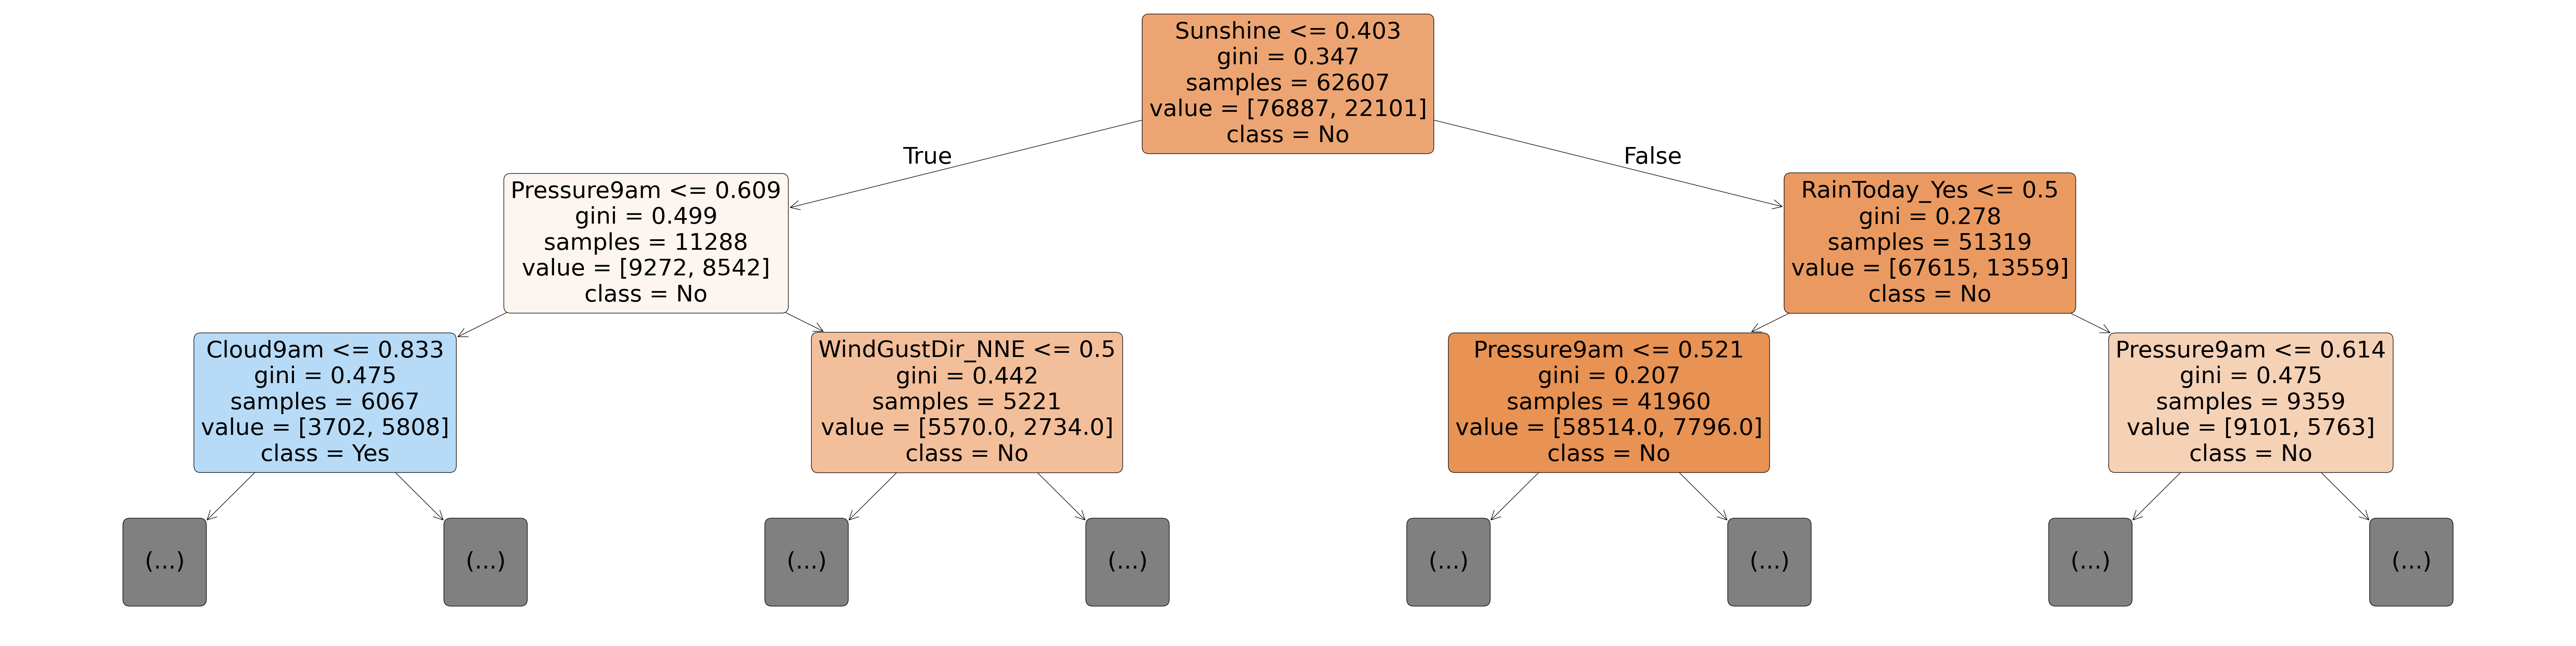

In [154]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

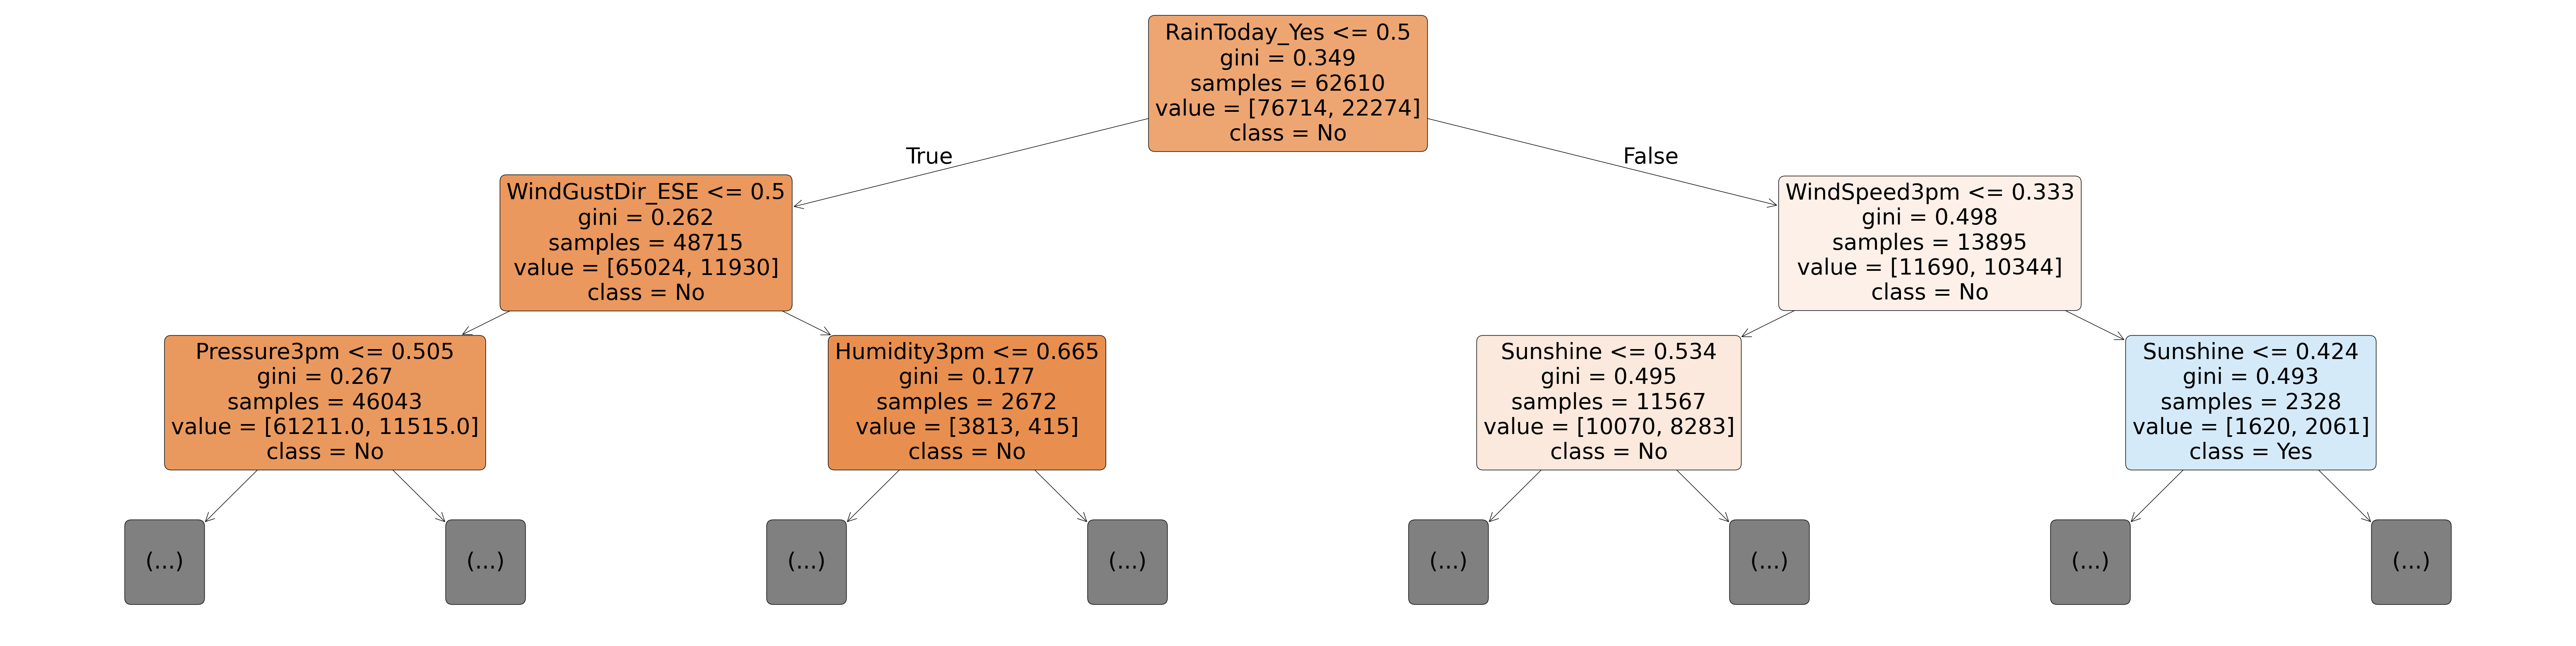

In [155]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

Random Forest cũng assign giá trị 'importance' bằng cách gom các điểm 'important' của từng tree trong rừng

In [156]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [159]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.139904
4,Sunshine,0.053696
11,Pressure3pm,0.052713
8,Humidity9am,0.050051
2,Rainfall,0.048077
10,Pressure9am,0.047944
5,WindGustSpeed,0.047477
15,Temp3pm,0.044379
1,MaxTemp,0.041865
0,MinTemp,0.041199


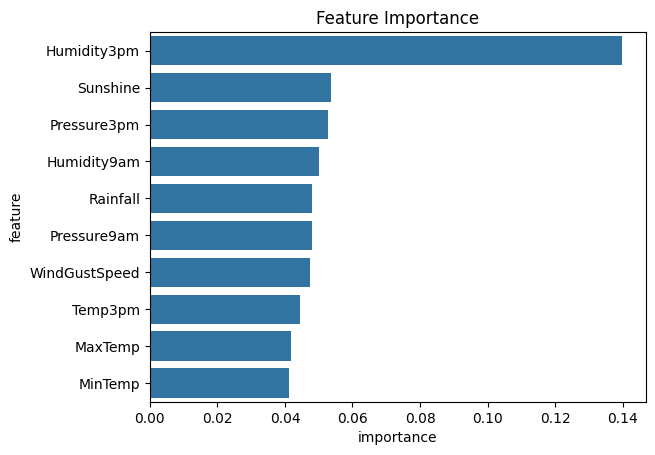

In [158]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Hyperparameter Tuning with Random Forests

Tương tự `Decision Tree`, ta cũng có thể tune được hyperparameters cho `Random Forest`

Xem thêm tại document của sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [160]:
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the 

Tạo ra 1 model baseline để so sánh

In [161]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, target_train)

base_train_acc = base_model.score(X_train, target_train)
base_val_acc = base_model.score(X_val, target_val)

base_accs = base_train_acc, base_val_acc
base_accs

(0.9999494888269285, 0.8566537055307295)

### `n_estimators`: Số lượng cây trong rừng (default = 100)

n_estimators = 10

In [162]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10).fit(X_train, target_train)

base_train_acc = base_model.score(X_train, target_train)
base_val_acc = base_model.score(X_val, target_val)

base_accs = base_train_acc, base_val_acc
base_accs

(0.986958015112943, 0.8485868492832686)

n_estimators = 50

In [163]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=50).fit(X_train, target_train)

base_train_acc = base_model.score(X_train, target_train)
base_val_acc = base_model.score(X_val, target_val)

base_accs = base_train_acc, base_val_acc
base_accs

(0.9996464217884996, 0.8561313910974406)

n_estimators = 500

In [165]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500).fit(X_train, target_train)

base_train_acc = base_model.score(X_train, target_train)
base_val_acc = base_model.score(X_val, target_val)

base_accs = base_train_acc, base_val_acc
base_accs

(0.9999797955307714, 0.8577563693343393)

Khởi tạo def test_param cho nhanh

In [166]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, target_train)
    return model.score(X_train, target_train), model.score(X_val, target_val)

### `max_depth` và `max_leaf_nodes`: Trỏ thẳng vào từng Decision Tree trong rừng.

In [167]:
test_params(max_depth=5)

(0.8197862367155615, 0.8240961058557251)

In [168]:
test_params(max_leaf_nodes=2**5)

(0.8314341132258456, 0.833904010214149)

### `max_features`: Thay vì lấy tất cả các features cho mỗi lượt split của từng cây, các features sẽ không được lấy hết mà lấy 1 phần ngẫu nhiên

Điều này tránh việc các cây trong rừng học y hệt nhau, đưa lại các kết quả y hệt nhau. Từ đó, các cây học 1 cách random hơn, khiến rừng đem lại kết quả tốt hơn.

<img src="https://i.imgur.com/FXGWMDY.png" width="720">

Giá trị default là `auto` lấy ra randomly $\sqrt{n}$ số lượng features tồn tại trong dataset. Đây là ý tưởng khiến cho các cây trong rừng khác biệt nhau. Điều này khiến cho rừng khái quát tốt hơn.

In [169]:
test_params(max_features=20)

(0.9999595910615429, 0.8565956705936975)

### `min_samples_split` và `min_samples_leaf`

Default thì decision tree split mỗi leaf thành 2 hoặc hơn. Ta có thể tăng giá trị của 2 hyperparams để thay đổi hành vi, giảm over-fit. Đặc biệt 2 hyperparams này có thể sẽ hoạt động rất tốt trong tệp dữ liệu lớn

In [170]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.8495676243585081, 0.8451047530613429)

### `min_impurity_decrease`

This argument is used to control the threshold for splitting nodes. A node will be split if this split induces a decrease of the impurity (Gini index) greater than or equal to this value. It's default value is 0, and you can increase it to reduce overfitting.


In [173]:
test_params(min_impurity_decrease=1e-2)

(0.774891906089627, 0.7882885497069235)

### `bootstrap`, `max_samples` 

By default, a random forest doesn't use the entire dataset for training each decision tree. Instead it applies a technique called bootstrapping. For each tree, rows from the dataset are picked one by one randomly, with replacement i.e. some rows may not show up at all, while some rows may show up multiple times.


<img src="https://i.imgur.com/W8UGaEA.png" width="640">

Bootstrapping helps the random forest generalize better, because each decision tree only sees a fraction of th training set, and some rows randomly get higher weightage than others.

In [174]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8567697754047937)

### `class_weight`

In [171]:
test_params(class_weight='balanced')

(0.9999595910615429, 0.8553769369160235)

### Gộp tất cả các hyperparameters

In [175]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=7,
                               max_depth=30, 
                               class_weight={'No': 1, 'Yes': 1.5})

In [176]:
model.fit(X_train, target_train)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [177]:
model.score(X_train, target_train), model.score(X_val, target_val)

(0.9920192346547057, 0.8563054959085369)

In [179]:
model.score(X_test, target_test)

0.8451913451913452

## Kết luận

Ta đã tăng độ chính xác từ 84,5% với một cây quyết định duy nhất lên 85,7% với một khu rừng ngẫu nhiên được điều chỉnh tốt. Tùy thuộc vào tập dữ liệu và loại vấn đề, có thể thấy hoặc không thấy sự cải thiện đáng kể với việc điều chỉnh siêu tham số.

Điều này có thể là do bất kỳ lý do nào sau đây:

- Ta có thể chưa tìm thấy sự kết hợp đúng đắn của các siêu tham số để điều chỉnh (giảm quá mức) mô hình một cách thích hợp và Ta nên tiếp tục cố gắng cải thiện mô hình.

- Ta có thể đã đạt đến giới hạn của kỹ thuật mô hình hóa mà Ta hiện đang sử dụng (Rừng ngẫu nhiên) và Ta nên thử một kỹ thuật mô hình hóa khác, ví dụ như tăng cường độ dốc.

- Ta có thể đã đạt đến giới hạn về những gì Ta có thể dự đoán bằng cách sử dụng lượng dữ liệu nhất định và Ta có thể cần nhiều dữ liệu hơn để cải thiện mô hình.

- Ta có thể đã đạt đến giới hạn về mức độ Ta có thể dự đoán tốt như thế nào về việc trời sẽ mưa vào ngày mai bằng cách sử dụng các phép đo thời tiết nhất định và Ta có thể cần nhiều tính năng hơn (cột) để cải thiện mô hình hơn nữa. Trong nhiều trường hợp, chúng ta cũng có thể tạo ra các tính năng mới bằng cách sử dụng các tính năng hiện có (đây được gọi là kỹ thuật tính năng).

- Liệu ngày mai trời có mưa hay không có thể là một hiện tượng ngẫu nhiên hoặc hỗn loạn vốn không thể dự đoán được ngoài một độ chính xác nhất định đối với bất kỳ lượng dữ liệu nào cho bất kỳ số lượng phép đo thời tiết nào bằng bất kỳ kỹ thuật mô hình hóa nào.

Hãy nhớ rằng cuối cùng thì tất cả các mô hình đều sai, nhưng một số mô hình hữu ích. Nếu bạn có thể dựa vào mô hình mà chúng ta đã tạo ra ngày hôm nay để đưa ra quyết định đi lại cho ngày mai, thì mô hình đó hữu ích, mặc dù đôi khi nó có thể sai.

### Chiến lược điều chỉnh siêu tham số

Đây là một chiến lược tốt để điều chỉnh siêu tham số:

1. Điều chỉnh siêu tham số quan trọng/có tác động nhất trước, ví dụ: `n_estimators`

2. Với giá trị tốt nhất của siêu tham số đầu tiên, hãy điều chỉnh siêu tham số có tác động lớn thứ hai

3. Cứ như vậy, tiếp tục đào tạo các tham số có tác động lớn thứ hai với các giá trị tốt nhất cho các tham số trước đó...

4. Sau đó, quay lại đầu trang và điều chỉnh từng tham số một lần nữa để có thêm gia tăng cận biên

Giữ cho các ideas và test cases được sắp xếp bằng cách sử dụng bảng theo dõi thử nghiệm: https://bit.ly/mltrackingsheet

Mục tiêu là giảm loss nhiều nhất có thể (ngay cả khi validation loss rất lớn), sau đó cố gắng điều chỉnh mô hình để giảm dần loss khi validation trong khi tăng training loss .

Điều chỉnh hyperparameters là 1 sự nghệ thuật hơn khoa học. 

Hãy cố gắng cảm nhận cách các tham số tương tác với nhau dựa trên sự hiểu biết về tham số

## Lưu trữ kết quả

In [180]:
import joblib

In [183]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': num_cols,
    'categorical_cols': cat_cols,
    'encoded_cols': encoded_cols
}

In [184]:
joblib.dump(aussie_rain, './joblib/aussie_rain_random_forest.joblib')

['./joblib/aussie_rain_random_forest.joblib']

### The End!

## Summary and References

The following topics were covered in this tutorial:

- Downloading a real-world dataset
- Preparing a dataset for training
- Training and interpreting decision trees
- Training and interpreting random forests
- Overfitting & hyperparameter tuning
- Making predictions on single inputs



We also introduced the following terms:

* Decision tree
* Random forest
* Overfitting
* Hyperparameter
* Hyperparameter tuning
* Ensembling
* Generalization
* Bootstrapping


Check out the following resources to learn more: 

- https://scikit-learn.org/stable/modules/tree.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
- https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering
- https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search
- https://www.kaggle.com/c/home-credit-default-risk/discussion/64821


Document: https://jovian.ai/aakashns/sklearn-decision-trees-random-forests

## Revision Questions
1.	What is a decision tree model?
2.	What is <code>DecisionTreeClassifier()</code>?
3.	Can we use decision tree only for Classifier? 
4.	How can you visualize the decision tree?
5.	What is <code>max_depth</code> in decision tree?
6.	What is gini index?
7.	What is feature importance?
8.	What is overfitting? What could be the reason for overfitting?
9.	What is hyperparameter tuning?
10.	What is one way to control the complexity of the decision tree?
11.	What is a random forest model?
12.	What is <code>RandomForestClassifier()</code>?
13.	What is <code>model.score()</code>?
14.	What is generalization?
15.	What is ensembling?
16.	What is <code>n_estimators</code> in hyperparameter tuning of random forests?
17.	What is underfitting?
18.	What does <code>max_features</code> parameter do?
19.	What are some features that help in controlling the threshold for splitting nodes in decision tree?
20.	What is bootstrapping? What is <code>max_samples</code> parameter in bootstrapping?
21.	What is <code>class_weight</code> parameter?
22.	You may or may not a see a significant improvement in the accuracy score with hyperparameter tuning. What could be the possible reasons for that?